In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(0)

In [24]:
# Load the IT data
data = pd.read_csv('../data/data_it.csv')
data = data.drop(data.columns[0], axis=1)

# Get the features X and target variable y
features = data.columns.difference(['Ticker Symbol', 'Period Ending', 'Next Qtr. Avg. Price'])
X = data[features] 
y = data['Next Qtr. Avg. Price']

In [25]:
# Split data into train and test

def split_data(group, train_size=0.7):
    if len(group) > 1:
        train, test = train_test_split(group, train_size=train_size, shuffle=False)
    else:
        train, test = group, group
    return train, test

# Initialize empty DataFrames for training and testing data
train_data = pd.DataFrame()
test_data = pd.DataFrame()

# Group by 'Ticker Symbol' and split the data
for symbol, group in data.groupby('Ticker Symbol'):
    train_group, test_group = split_data(group)
    train_data = pd.concat([train_data, train_group])
    test_data = pd.concat([test_data, test_group])

# Reset the index of the resulting DataFrames
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)


train_data.to_csv('./outputs/train_data.csv')
test_data.to_csv('./outputs/test_data.csv')

X_train = train_data[features]
y_train = train_data['Next Qtr. Avg. Price']

X_test = test_data[features]
y_test = test_data['Next Qtr. Avg. Price']


In [26]:
# Standardize the features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
# Build and train the model

model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

R-squared: -0.92


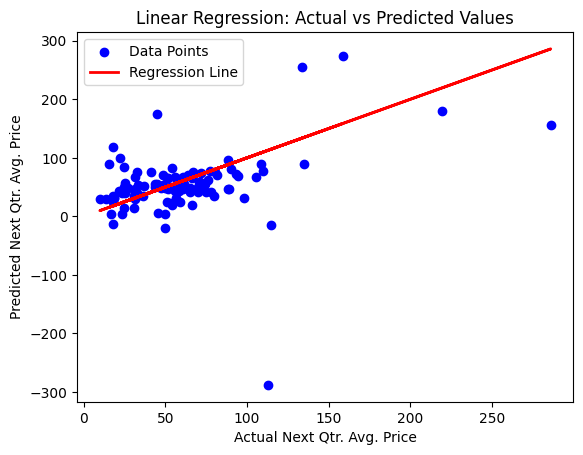

In [28]:
# Evaluate the model

y_pred = model.predict(X_test_scaled)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2:.2f}')


# Plotting the scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', label='Data Points')

# Plotting the regression line  
plt.plot(y_test, y_test, color='red', linewidth=2, label='Regression Line')

plt.xlabel('Actual Next Qtr. Avg. Price')
plt.ylabel('Predicted Next Qtr. Avg. Price')
plt.title('Linear Regression: Actual vs Predicted Values')
plt.legend()
plt.show()

